# Introduction to NLTK, NumPy, SciPy, and MatPlotLib

Practical course material for the ASDM Class 09 (Text Mining) by Florian Leitner.

© 2016 Florian Leitner. All rights reserved.

This lab will cover working with the [Natural Langauge ToolKit](http://www.nltk.org/index.html), with [Numerical and Scientific Python aka. NumPy and SciPy](http://www.numpy.org/), and with [MatPlotLib](http://matplotlib.org/) (while your instructor ensures that all participants have a working notebook environment...). These are maybe the most fundamental libraries to do Computational Linguistics and Scientific Computing using Python.

In [1]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


If you have not yet done so already, read up on pylab and, in particular, what `--no-import-all` does.

In [2]:
%pylab?

## Natural Language ToolKit

Try to import the NLTK library; If that does not work, you need to install it with `conda install nltk` if you are using Anaconda Python (or `pip3 install nltk` if you are using regular Python).

In [3]:
import nltk
print(nltk.__version__) # should be 3.2.1 or newer

3.2.5


Fetch some metadata (text "copora") for the NLTK; we will use only `book` content.

In [4]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

This should have opened another window where you can choose what corpora to download. It is sufficient for now to only download the `book` content. Note that downloading everything can take quite a while...

In [5]:
# export NLTK_DATA="/Users/fnl/work/var/nltk_data"
import nltk.book as b

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### The Text Object

In [6]:
b.text1

<Text: Moby Dick by Herman Melville 1851>

In [7]:
type(b.text1)

nltk.text.Text

Some quick info:

In [8]:
nltk.text.Text?

More in-depth documentation with all methods defined on `Text`:

In [9]:
help(nltk.text.Text)

Help on class Text in module nltk.text:

class Text(builtins.object)
 |  A wrapper around a sequence of simple (string) tokens, which is
 |  intended to support initial exploration of texts (via the
 |  interactive console).  Its methods perform a variety of analyses
 |  on the text's contexts (e.g., counting, concordancing, collocation
 |  discovery), and display the results.  If you wish to write a
 |  program which makes use of these analyses, then you should bypass
 |  the ``Text`` class, and use the appropriate analysis function or
 |  class directly instead.
 |  
 |  A ``Text`` is typically initialized from a given document or
 |  corpus.  E.g.:
 |  
 |  >>> import nltk.corpus
 |  >>> from nltk.text import Text
 |  >>> moby = Text(nltk.corpus.gutenberg.words('melville-moby_dick.txt'))
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, i)
 |  
 |  __init__(self, tokens, name=None)
 |      Create a Text object.
 |      
 |      :param tokens: The source text.
 |      :type t

In [10]:
# create a shortcut to Moby Dick
moby = b.text1
# iteration over all words in Moby Dick using a Python list comprehension
wlens = [len(w) for w in moby]
# show the first ten words
print(" ".join(moby[:10]))
# report the lengths of the first ten words
wlens[:10]

[ Moby Dick by Herman Melville 1851 ] ETYMOLOGY .


[1, 4, 4, 2, 6, 8, 4, 1, 9, 1]

Count the frequency of "me" in Moby Dick

In [11]:
moby.count("me")

627

In [12]:
moby.findall?

Find all tokens before "Moby" in the text.

In [13]:
moby.findall("<.*><Moby>")

[ Moby; call Moby; " Moby; is Moby; -- Moby; -- Moby; of Moby; not
Moby; was Moby; ; Moby; for Moby; for Moby; to Moby; hunt Moby; 41
Moby; concerning Moby; than Moby; to Moby; upon Moby; invested Moby;
to Moby; to Moby; that Moby; declaring Moby; , Moby; in Moby; touching
Moby; though Moby; , Moby; blow Moby; of Moby; at Moby; of Moby;
respecting Moby; than Moby; to Moby; of Moby; , Moby; of Moby; was
Moby; "' Moby; you Moby; of Moby; , Moby; this Moby; of Moby; seen
Moby; that Moby; concerning Moby; of Moby; , Moby; surrender Moby; to
Moby; , Moby; -- Moby; about Moby; thinking Moby; slay Moby; is Moby;
for Moby; for Moby; Oh Moby; of Moby; encountered Moby; to Moby; is
Moby; , Moby; awaiting Moby; was Moby; , Moby; , Moby; , Moby; from
Moby; of Moby; not Moby; -- Moby; , Moby; , Moby; with Moby; , Moby; ,
Moby; , Moby; ! Moby; , Moby


Now find all tokens occuring before "Dick" in the text.

In [14]:
moby.findall("<.*><Dick>")

Moby Dick; Moby Dick; Moby Dick; Moby Dick; Moby Dick; Moby Dick; Moby
Dick; Moby Dick; Moby Dick; Moby Dick; Moby Dick; Moby Dick; Moby
Dick; Moby Dick; Moby Dick; Moby Dick; Moby Dick; Moby Dick; Moby
Dick; Moby Dick; Moby Dick; Moby Dick; Moby Dick; Moby Dick; Moby
Dick; Moby Dick; Moby Dick; Moby Dick; Moby Dick; Moby Dick; Moby
Dick; Moby Dick; Moby Dick; Moby Dick; Moby Dick; Moby Dick; Moby
Dick; Moby Dick; Moby Dick; Moby Dick; Moby Dick; Moby Dick; Moby
Dick; Moby Dick; Moby Dick; Moby Dick; Moby Dick; Moby Dick; Moby
Dick; Moby Dick; Moby Dick; Moby Dick; Moby Dick; Moby Dick; Moby
Dick; Moby Dick; Moby Dick; Moby Dick; Moby Dick; Moby Dick; Moby
Dick; Moby Dick; Moby Dick; Moby Dick; Moby Dick; Moby Dick; Moby
Dick; Moby Dick; Moby Dick; Moby Dick; Moby Dick; Moby Dick; Moby
Dick; - Dick; Moby Dick; Moby Dick; Moby Dick; Moby Dick; Moby Dick;
Moby Dick; Moby Dick; Moby Dick; Moby Dick; Moby Dick


Use regular expressions (here: only tokens with letters - roughly, "words") to match tokens.

In [15]:
moby.findall("<[A-Za-z]*><Moby>")

call Moby; is Moby; of Moby; not Moby; was Moby; for Moby; for Moby;
to Moby; hunt Moby; concerning Moby; than Moby; to Moby; upon Moby;
invested Moby; to Moby; to Moby; that Moby; declaring Moby; in Moby;
touching Moby; though Moby; blow Moby; of Moby; at Moby; of Moby;
respecting Moby; than Moby; to Moby; of Moby; of Moby; was Moby; you
Moby; of Moby; this Moby; of Moby; seen Moby; that Moby; concerning
Moby; of Moby; surrender Moby; to Moby; about Moby; thinking Moby;
slay Moby; is Moby; for Moby; for Moby; Oh Moby; of Moby; encountered
Moby; to Moby; is Moby; awaiting Moby; was Moby; from Moby; of Moby;
not Moby; with Moby


Use regular expression grouping `()` to extract only specific tokens that were matched.

In [16]:
moby.findall("(<[A-Za-z]*>)<Moby>")

call; is; of; not; was; for; for; to; hunt; concerning; than; to;
upon; invested; to; to; that; declaring; in; touching; though; blow;
of; at; of; respecting; than; to; of; of; was; you; of; this; of;
seen; that; concerning; of; surrender; to; about; thinking; slay; is;
for; for; Oh; of; encountered; to; is; awaiting; was; from; of; not;
with


In [17]:
moby.similar?

In [18]:
moby.similar("boy") # NB: semantic similarity ("synonyms")

man boat captain soul and i while whale more sometimes when if ship
than though good mary to body brain


In [19]:
len(b.text3) # total tokens

44764

In [20]:
len(set(b.text3)) # unique tokens

2789

In [21]:
wlens[:5]

[1, 4, 4, 2, 6]

In [22]:
sum(wlens) / len(wlens) # mean

3.830411128023649

In [23]:
sum(wlens) * 1.0 / len(wlens)

3.830411128023649

Finding the median token length:

In [24]:
wlens = sorted(wlens)

In [25]:
wlens[len(wlens) // 2]

3

The longest token in the book:

In [26]:
wlens[-1]

20

### Plots available directly from a Text Object

The text object and the tools that follow form an extremely important toolkit of any text miner or computational linguist. They allow us to visually inspect the properties of our text (collection/corpus).

In [27]:
b.text2

<Text: Sense and Sensibility by Jane Austen 1811>

In [28]:
b.text3

<Text: The Book of Genesis>

In [29]:
b.text3.plot?

In [30]:
nltk.probability.FreqDist.plot?

Show the most frequent tokens in a text; note the Zipfian distributions!

260819


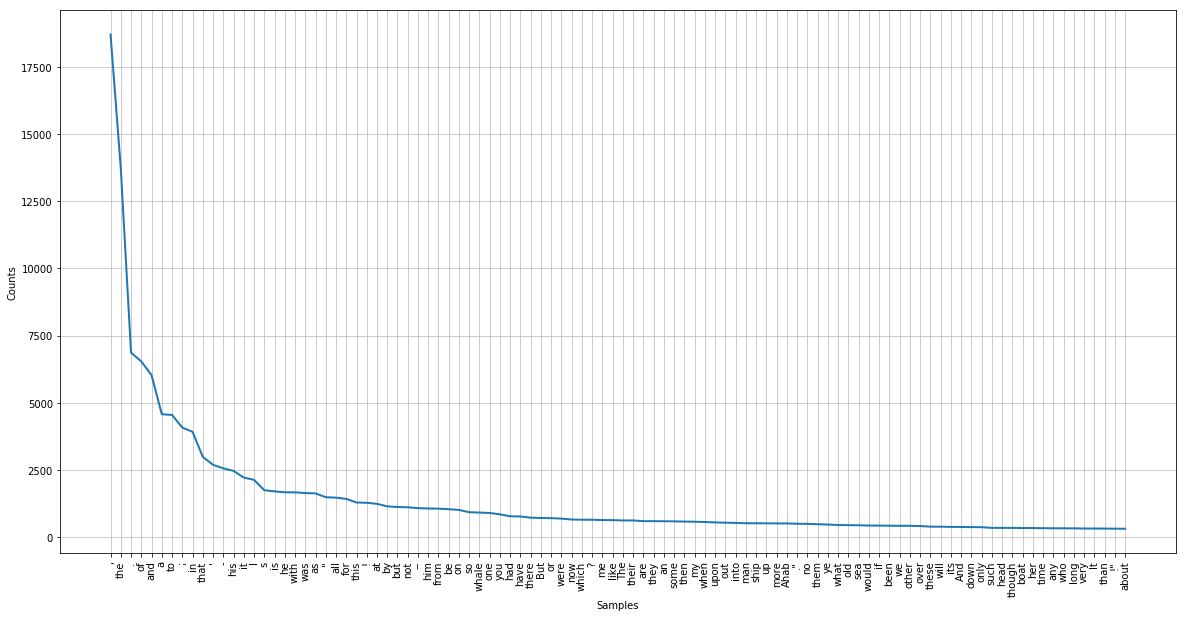

In [31]:
plt.figure(figsize=(20,10))
print(len(b.text1))
b.text1.plot(100)

141576


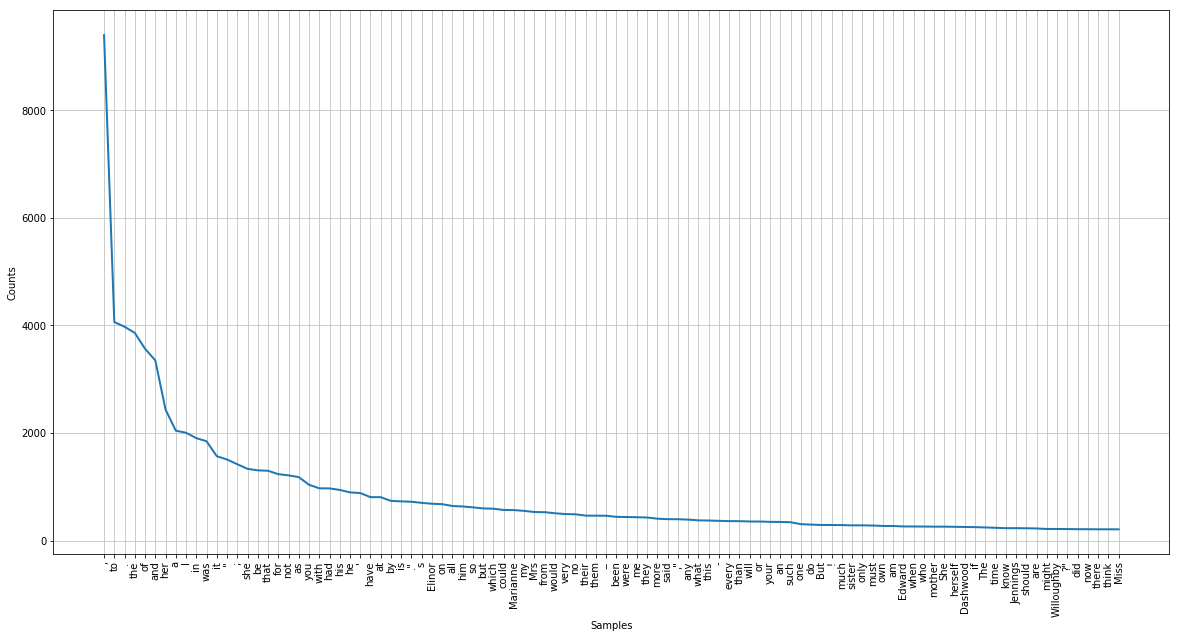

In [32]:
plt.figure(figsize=(20,10))
print(len(b.text2))
b.text2.plot(100)

44764


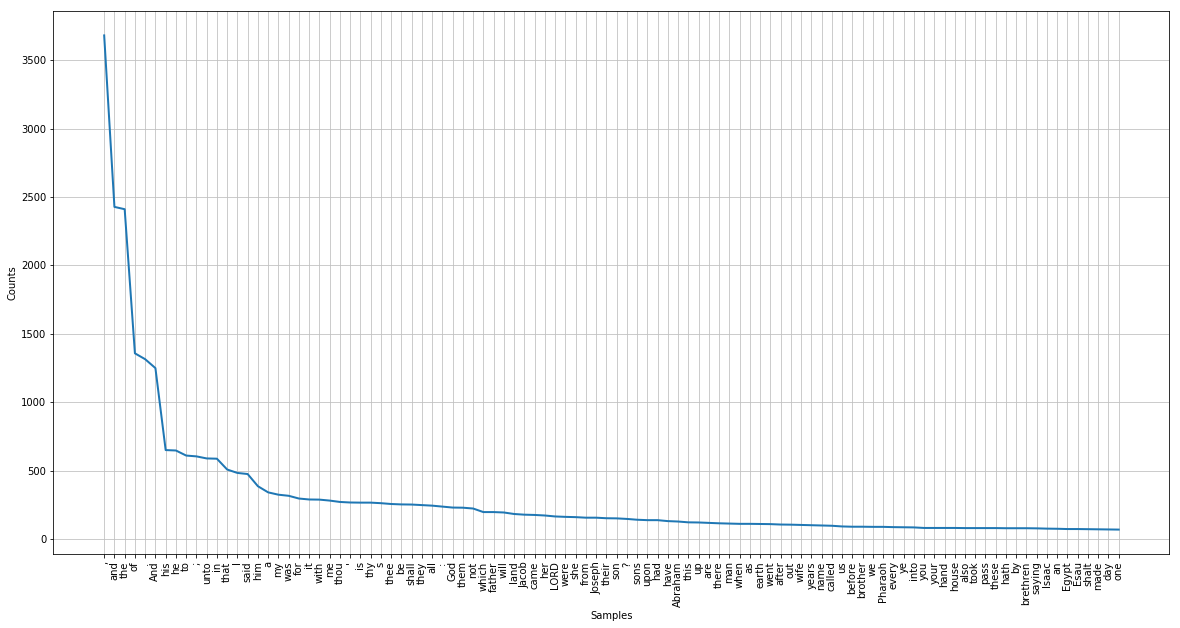

In [33]:
plt.figure(figsize=(20,10))
print(len(b.text3))
b.text3.plot(100)

Note that the larger the "buldge" on the left and the wider the tail to the right, the larger the semantic richness of the text. Which of the books is semantically richer, then? Would you agree its book 2, "Sense and Sensibility by Jane Austen 1811"?

In [34]:
b.text2.collocations?

**Collocations** are pairs of words that occur together more frequently than would be expected by chance. Therefore, we can assume the pairs have semantics that go beyond the semantic of each individual word.

In [35]:
b.text2.collocations()

Colonel Brandon; Sir John; Lady Middleton; Miss Dashwood; every thing;
thousand pounds; dare say; Miss Steeles; said Elinor; Miss Steele;
every body; John Dashwood; great deal; Harley Street; Berkeley Street;
Miss Dashwoods; young man; Combe Magna; every day; next morning


In [36]:
b.text2.dispersion_plot?

In a nutshell, plot the occurrence of each word in the text. Lets look at the most frequent proper nouns (names) as we found above in the frequency plot.

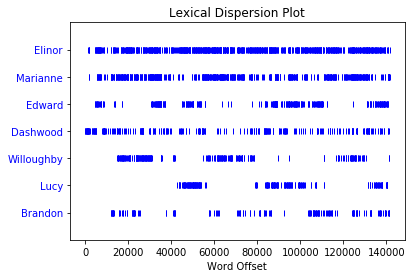

In [37]:
b.text2.dispersion_plot(["Elinor", "Marianne", "Edward", "Dashwood", "Willoughby", "Lucy", "Brandon"])

So this allows us to even quickly get a "feel" for the story itself, e.g., here you can easily tell who interacts with whom (or who not)!

### NLTK's Discrete "Frequency" Distributions

A counter for tokens.

In [38]:
from nltk import FreqDist

In [39]:
fdist = FreqDist(b.text2)

In [40]:
list(fdist.items())[:10]

[('[', 3),
 ('Sense', 1),
 ('and', 3350),
 ('Sensibility', 1),
 ('by', 737),
 ('Jane', 1),
 ('Austen', 1),
 ('1811', 1),
 (']', 1),
 ('CHAPTER', 50)]

In [41]:
fdist.max() # the word length with the highest count

','

In [42]:
fdist["the"] # the count for the token "the" 

3861

In [43]:
fdist.freq("the") # frequency/total_frequency => the probability of the token "the"

0.027271571452788607

## NumPy and SciPy: Numeric Python

A good NumPy tutorial: [www.engr.ucsb.edu/~shell/che210d/numpy.pdf](http://www.engr.ucsb.edu/~shell/che210d/numpy.pdf)

The API/reference for NumPy and SciPy: [docs.scipy.org/doc/](http://docs.scipy.org/doc/)

In [44]:
# already done for us by the %pylab setup at the beginning:
# import numpy as np

### NumPy Arrays as Vectors

In [45]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
a.shape

(10,)

In [47]:
b = np.arange(10, 20)
b

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [48]:
a * b

array([  0,  11,  24,  39,  56,  75,  96, 119, 144, 171])

In [49]:
a < b # NumPy arrays generally behave simlarly to R vectors

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [50]:
c = np.concatenate((a, b)) # NB that the argument to np.concatenate() is a SINGLE LIST
c

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [51]:
a[a > 5]

array([6, 7, 8, 9])

In [52]:
a.dot(b)

735

In [53]:
np.where(a > 5, "greater", "lesser")

array(['lesser', 'lesser', 'lesser', 'lesser', 'lesser', 'lesser',
       'greater', 'greater', 'greater', 'greater'], dtype='<U7')

In [54]:
a.view?

In [55]:
if 5 in a:
    print("hurray")

hurray


In [56]:
5.0 in a # "a" is a list of integers, "5.0" is a float

True

### Array Statistics

Let's convert our `wlens` list from the NLTK part to a NumPy array:

In [57]:
wlarr = np.array(wlens)

In [58]:
wlarr.sum()

999044

In [59]:
wlarr.mean()

3.830411128023649

In [60]:
wlarr.var()

5.892518355697793

In [61]:
wlarr.std()

2.427450999649178

In [62]:
wlarr.min()

1

In [63]:
wlarr.max()

20

In [64]:
wlarr.argmax?

In [65]:
wlarr[wlarr.argmax()]

20

In [66]:
wlarr.sort()

In [67]:
wlarr[len(wlarr)//2]

3

In [68]:
np.median(wlarr) # NB: median is not a method defined on array!

3.0

### Arrays as Matrices

In [69]:
a = np.array([[0, 1], [2, 3]], float)
b = np.array([2, 3], float)
c = np.array([[1, 1], [4, 0]], float)
a

array([[0., 1.],
       [2., 3.]])

In [70]:
a.shape

(2, 2)

In [71]:
b * a

array([[0., 3.],
       [4., 9.]])

In [72]:
b.dot(a)

array([ 6., 11.])

In [73]:
a.dot(c)

array([[ 4.,  0.],
       [14.,  2.]])

In [74]:
np.cross(a, b)

array([-2.,  0.])

In [75]:
np.inner(a, b)

array([ 3., 13.])

In [76]:
np.outer(a, b)

array([[0., 0.],
       [2., 3.],
       [4., 6.],
       [6., 9.]])

### Linear Algebra Functions

In [77]:
np.linalg.det(a)

-2.0

In [78]:
np.linalg.eig(a)

(array([-0.56155281,  3.56155281]), array([[-0.87192821, -0.27032301],
        [ 0.48963374, -0.96276969]]))

In [79]:
np.linalg.inv(a)

array([[-1.5,  0.5],
       [ 1. ,  0. ]])

In [80]:
np.linalg.svd(a)

(array([[-0.22975292, -0.97324899],
        [-0.97324899,  0.22975292]]),
 array([3.70245917, 0.54018151]),
 array([[-0.52573111, -0.85065081],
        [ 0.85065081, -0.52573111]]))

### Advanced Linear Algrebra

In [81]:
from scipy import linalg as la

In [82]:
la.svd(a)

(array([[-0.22975292, -0.97324899],
        [-0.97324899,  0.22975292]]),
 array([3.70245917, 0.54018151]),
 array([[-0.52573111, -0.85065081],
        [ 0.85065081, -0.52573111]]))

In [83]:
%timeit np.linalg.svd(a)

24.1 µs ± 1.23 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [84]:
%timeit la.svd(a)

82 µs ± 6.33 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Other important functionalty provided by SciPy modules:

* `constants` - a huge list of math/phys constants
* `integrate` - numerical integration/ODEs
* `optimize` - optimization functions (e.g., BFGS is here)
* `sparse` - working with large, sparse matrices
* `interpolate` - interpolation for discrete data (linear and spline)
* `fftpack` - Fast Fourier transform routines
* `signal` - Signal processing (time-series analysis)
* **`stats`** - a huge collection of distribtuions and functions

### Statistical Functions

Three variables, four instances:

In [85]:
data = np.array([[1, 2, 1, 3], [5, 3, 1, 8], [2, 1, 5, 6]], float)

In [86]:
np.corrcoef(data)

array([[1.        , 0.72870505, 0.36563621],
       [0.72870505, 1.        , 0.30480845],
       [0.36563621, 0.30480845, 1.        ]])

In [87]:
np.cov(data)

array([[0.91666667, 2.08333333, 0.83333333],
       [2.08333333, 8.91666667, 2.16666667],
       [0.83333333, 2.16666667, 5.66666667]])

In [88]:
from scipy import stats # by the way, "RV" means "random variable"

In [89]:
stats.norm.pdf?

In [90]:
d = stats.norm.pdf([-1.0, 0.0, 1.0])
d

array([0.24197072, 0.39894228, 0.24197072])

In [91]:
d.min()

0.24197072451914337

In [92]:
d.max()

0.3989422804014327

In [93]:
d.mean()

0.2942945764799065

For more info on working with distributions, have a look at the SciPy stats tutorial at [docs.scipy.org/doc/scipy/reference/tutorial/stats.html](http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)

# Simple Barcharts with MatPlotLib

`matplotlib` is slightly over-enginered, particularly if you are used to R's `ggplot`: Just plotting a barchart for a dictionary of word counts can be a challenge for beginners. Here's how...

In [94]:
d = {'word': 3, 'other': 7, 'another': 2, 'hello': 5, 'plot': 4}

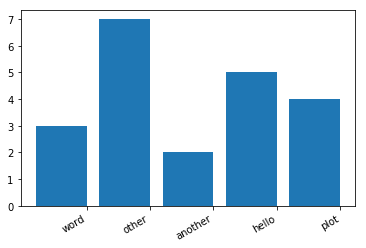

In [95]:
fig = plt.figure()
ax = fig.add_subplot(111)
rng = np.arange(len(d))
words, counts = zip(*d.items())
ax.bar(rng, counts)
ax.set_xticks(rng + 0.4)
ax.set_xticklabels(words)
fig.autofmt_xdate()

Let's implement this as a function:

In [96]:
def wordchart(counts):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    rng = np.arange(len(counts))
    words, counts = zip(*counts.items())
    ax.bar(rng, counts)
    ax.set_xticks(rng + 0.4)
    ax.set_xticklabels(words)
    fig.autofmt_xdate()

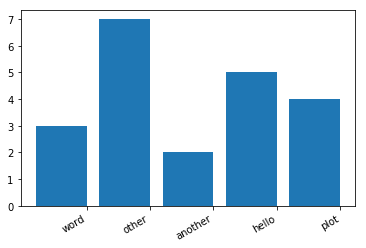

In [97]:
wordchart(d)